In [2]:
# %% Libraries
# Other stuff
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


In [70]:
# %% Load data
#BB = pd.read_csv('BB_prices.csv')
GME = pd.read_csv('gme2_prices.csv')
AMC = pd.read_csv('AMC_prices.csv')
sp500 = pd.read_csv('SP500_AMC_index.csv')
#sentiment = pd.read_csv('Reddit_AFINN.csv')

In [71]:
GME

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-01-04 00:00:00-05:00,4.750000,4.775000,4.287500,4.312500,40090000,0.0,0.0
1,2021-01-05 00:00:00-05:00,4.337500,4.520000,4.307500,4.342500,19846000,0.0,0.0
2,2021-01-06 00:00:00-05:00,4.335000,4.745000,4.332500,4.590000,24224800,0.0,0.0
3,2021-01-07 00:00:00-05:00,4.617500,4.862500,4.505000,4.520000,24517200,0.0,0.0
4,2021-01-08 00:00:00-05:00,4.545000,4.575000,4.270000,4.422500,25928000,0.0,0.0
...,...,...,...,...,...,...,...,...
246,2021-12-23 00:00:00-05:00,38.500000,38.750000,36.505001,38.035000,4222000,0.0,0.0
247,2021-12-27 00:00:00-05:00,38.000000,38.154999,35.000000,37.077499,6454400,0.0,0.0
248,2021-12-28 00:00:00-05:00,36.875000,39.352501,36.602501,36.615002,5324400,0.0,0.0
249,2021-12-29 00:00:00-05:00,36.962502,38.872501,35.535000,38.482498,8149600,0.0,0.0


In [72]:
# %% Format as date
#sentiment['Date'] = pd.to_datetime(sentiment['timestamp'])
GME['Date'] = pd.to_datetime(GME['Date'])
AMC['Date'] = pd.to_datetime(AMC['Date'])
sp500['Date'] = pd.to_datetime(sp500['Date'])

C:\Users\U422967\AppData\Local\Temp\ipykernel_13884\1442837923.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise a warning unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  GME['Date'] = pd.to_datetime(GME['Date'])
C:\Users\U422967\AppData\Local\Temp\ipykernel_13884\1442837923.py:4: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise a warning unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  AMC['Date'] = pd.to_datetime(AMC['Date'])
C:\Users\U422967\AppData\Local\Temp\ipykernel_13884\1442837923.py:5: FutureWarning: In a future version of pandas, parsing datetimes

In [73]:
# %% Price changes
GME['Rel_change'] = np.log(GME['Close']) - np.log(GME['Open'])
AMC['Rel_change'] = np.log(AMC['Close']) - np.log(AMC['Open'])
sp500['Rel_change'] = np.log(sp500['Close']) - np.log(sp500['Open'])

In [68]:
# Filter data for the specified date range
start_date = '2021-01-01'
end_date = '2021-09-01'

AMC_filtered = AMC[(AMC['Date'] >= start_date) & (AMC['Date'] <= end_date)]
sp500_filtered = sp500[(sp500['Date'] >= start_date) & (sp500['Date'] <= end_date)]


TypeError: '>=' not supported between instances of 'Timestamp' and 'str'

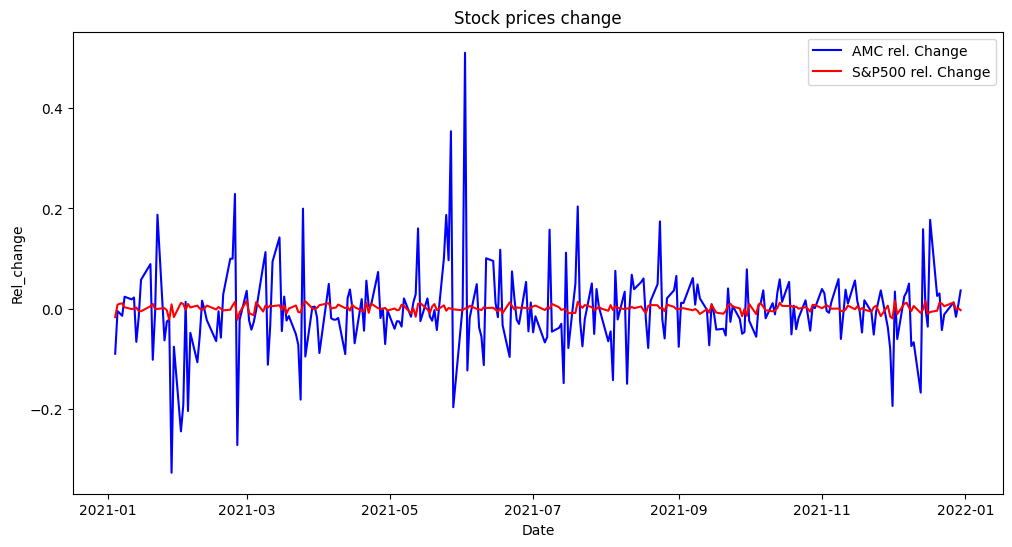

In [67]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=AMC, x='Date', y='Rel_change', label='AMC rel. Change', color='b')
sns.lineplot(data=sp500, x='Date', y='Rel_change', label='S&P500 rel. Change', color='r')
plt.xlabel('Date')
plt.title('Stock prices change')
plt.legend()
plt.show()


In [43]:
# Notice that they follow each other
# We are more interested in instances where gme changes are different from sp500

# %% Merge stock prices
sp500_0 = sp500[['Date', 'Rel_change']] # Limited sp500 data
# Renaming
sp500_0 = sp500_0.rename(columns={"Date": "Date", "Rel_change": "Rel_change_SP500"})


In [74]:
# Merging
stocks = pd.merge(GME, sp500_0, on="Date")


In [75]:
# Calculating relative changes to SP changes 
stocks['Rel_change_to_SP500'] = stocks['Rel_change'] - stocks['Rel_change_SP500']


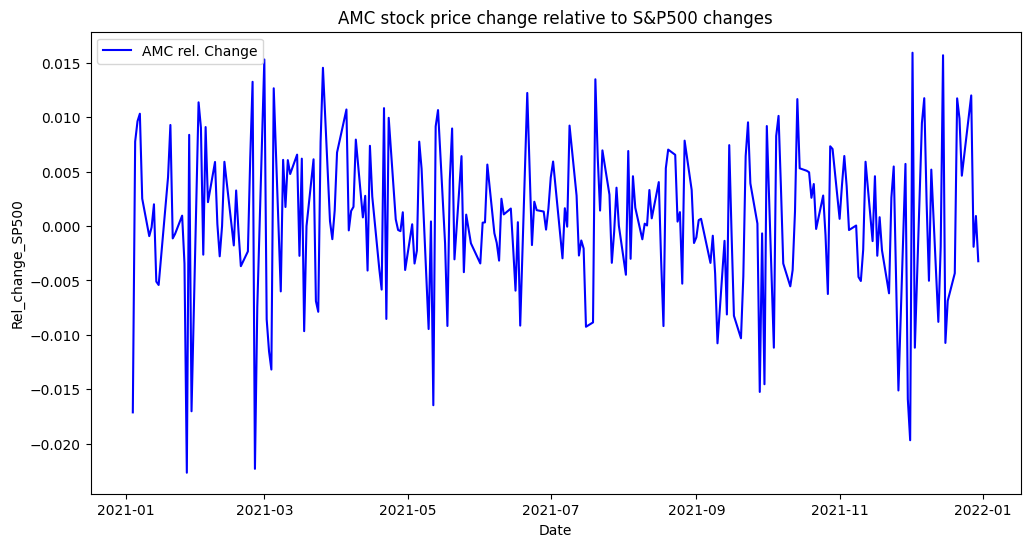

In [76]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=stocks, x='Date', y='Rel_change_SP500', label='AMC rel. Change', color='b')
plt.xlabel('Date')
plt.title('AMC stock price change relative to S&P500 changes')
plt.legend()
plt.show()

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load data from CSV
df = pd.read_csv('NewsAndMarket - Kopi.csv')

# Convert the 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Ensure the 'title_sentiment' column is numeric
df['title_sentiment'] = pd.to_numeric(df['title_sentiment'], errors='coerce')

# Drop rows where 'timestamp' or 'title_sentiment' is NaN (if any)
df.dropna(subset=['timestamp', 'title_sentiment'], inplace=True)

# Set the 'timestamp' as the index
df.set_index('timestamp', inplace=True)

# Filter data based on keywords in 'body'
keywords = ['GME', 'Gamestop', 'gme']
filtered_df = df[df['title'].str.contains('|'.join(keywords), case=False, na=False)]

# Calculate the average sentiment score for each day
average_daily_sentiment = filtered_df.resample('D')['title_sentiment'].mean()

# Filter the data to include only January and February of 2021
filtered_average_sentiment = average_daily_sentiment['2021-01-01':'2021-09-01'].reset_index()


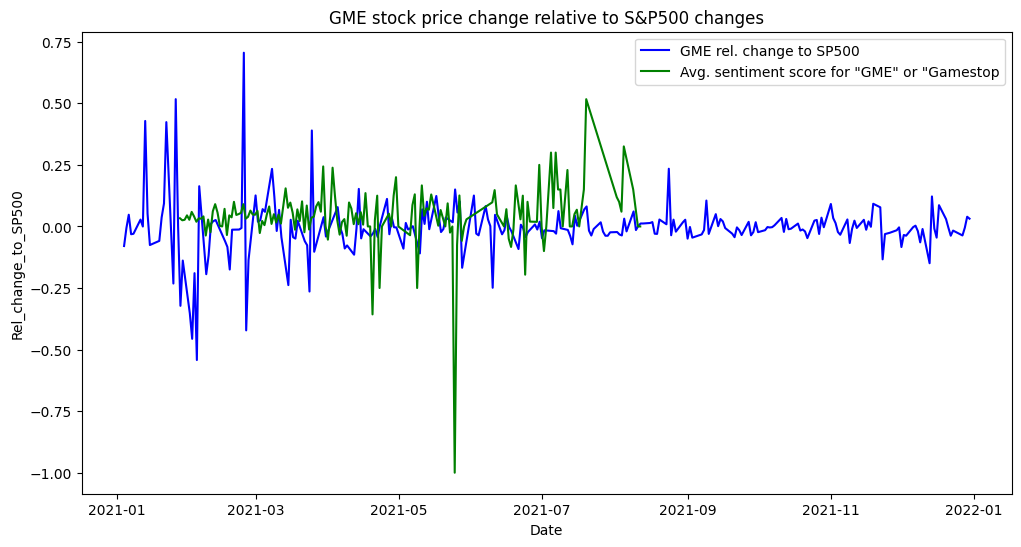

In [79]:
# %% Add sentiment
plt.figure(figsize=(12, 6))
sns.lineplot(data=stocks, x='Date', y='Rel_change_to_SP500', label='GME rel. change to SP500', color='b')
sns.lineplot(data=filtered_average_sentiment, x='timestamp', y='title_sentiment', label='Avg. sentiment score for "GME" or "Gamestop', color='g')
#sns.lineplot(data=bb_sentiment, x='Date', y='Content_sentiment', label='Content', color='r')
plt.xlabel('Date')
plt.title('GME stock price change relative to S&P500 changes')
plt.legend()
plt.show()

In [59]:
# %% We need to normalize to get anything useful
# Standardization
def Standardization(x):
    mean = np.mean(x)
    std = np.std(x)
    return (x - mean) / std

In [60]:
filtered_average_sentiment["title_sentiment"] = Standardization(filtered_average_sentiment["title_sentiment"])
stocks['Rel_change_to_SP500_std'] = Standardization(stocks['Rel_change_to_SP500'])

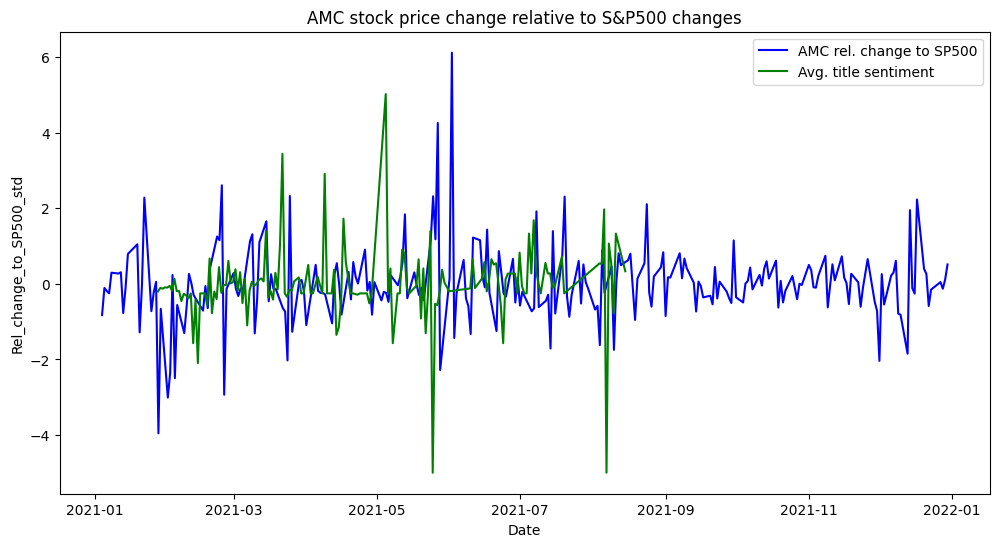

In [61]:
# %% Plot again
plt.figure(figsize=(12, 6))
sns.lineplot(data=stocks, x='Date', y='Rel_change_to_SP500_std', label='AMC rel. change to SP500', color='b')
sns.lineplot(data=filtered_average_sentiment, x='timestamp', y='title_sentiment', label='Avg. title sentiment', color='g')
#sns.lineplot(data=bb_sentiment, x='Date', y='Content_sentiment_std', label='Content', color='r')
plt.xlabel('Date')
plt.title('AMC stock price change relative to S&P500 changes')
plt.legend()
plt.show()